**Importing required libraries**

# **Employe work attrition** 

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

# import train-test split 
from sklearn.model_selection import train_test_split

# import StandardScaler to perform scaling
from sklearn.preprocessing import StandardScaler 

# import various functions from sklearn
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
# to suppress warnings 
from warnings import filterwarnings
filterwarnings('ignore')


plt.rcParams['figure.figsize']=[15,8]

**Read the Dataframe**

In [3]:
Data=pd.read_csv('/content/drive/MyDrive/Makya/Attrition.csv')


**Droping the row index which are not useful dataframe**

In [5]:
df=Data.drop(Data.index[5180:])
df

,EmployeeID,Attrition,Age,TravelProfile,Department,HomeToWork,EducationField,Gender,HourlnWeek,Involvement,...,JobSatisfaction,ESOPs,NumCompaniesWorked,OverTime,SalaryHikelastYear,WorkExperience,LastPromotion,CurrentProfile,MaritalStatus,MonthlyIncome
0,5110001.0,0.0,35.0,Rarely,Analytics,5.0,CA,Male,69.0,1.0,...,1.0,1.0,1.0,1.0,20.0,7.0,2.0,NaN,M,18932.0
1,5110002.0,1.0,32.0,Yes,Sales,5.0,Statistics,Female,62.0,4.0,...,2.0,0.0,8.0,0.0,20.0,4.0,1.0,NaN,Single,18785.0
2,5110003.0,0.0,31.0,Rarely,Analytics,5.0,Statistics,F,45.0,5.0,...,2.0,1.0,3.0,0.0,26.0,12.0,1.0,3.0,Single,22091.0
3,5110004.0,0.0,34.0,Yes,Sales,10.0,Statistics,Female,32.0,3.0,...,4.0,1.0,1.0,0.0,23.0,5.0,1.0,3.0,Divorsed,20302.0
4,5110005.0,0.0,37.0,No,Analytics,27.0,Statistics,Female,49.0,3.0,...,4.0,1.0,8.0,0.0,21.0,12.0,1.0,9.0,Divorsed,21674.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5175,5115176.0,0.0,36.0,Rarely,Analytics,13.0,CA,F,53.0,3.0,...,3.0,0.0,4.0,1.0,22.0,11.0,1.0,5.0,Single,22142.0
5176,5115177.0,0.0,NaN,Rarely,Marketing,9.0,CA,Female,66.0,1.0,...,4.0,1.0,9.0,0.0,23.0,8.0,0.0,2.0,Single,17109.0
5177,5115178.0,0.0,29.0,Rarely,Analytics,NaN,CA,Female,62.0,4.0,...,1.0,1.0,6.0,0.0,19.0,8.0,0.0,3.0,M,17532.0
5178,5115179.0,0.0,26.0,Rarely,Marketing,26.0,Statistics,Female,61.0,3.0,...,3.0,0.0,1.0,0.0,28.0,8.0,5.0,7.0,Divorsed,17942.0


In [6]:
df.tail()

,EmployeeID,Attrition,Age,TravelProfile,Department,HomeToWork,EducationField,Gender,HourlnWeek,Involvement,...,JobSatisfaction,ESOPs,NumCompaniesWorked,OverTime,SalaryHikelastYear,WorkExperience,LastPromotion,CurrentProfile,MaritalStatus,MonthlyIncome
5175,5115176.0,0.0,36.0,Rarely,Analytics,13.0,CA,F,53.0,3.0,...,3.0,0.0,4.0,1.0,22.0,11.0,1.0,5.0,Single,22142.0
5176,5115177.0,0.0,NaN,Rarely,Marketing,9.0,CA,Female,66.0,1.0,...,4.0,1.0,9.0,0.0,23.0,8.0,0.0,2.0,Single,17109.0
5177,5115178.0,0.0,29.0,Rarely,Analytics,NaN,CA,Female,62.0,4.0,...,1.0,1.0,6.0,0.0,19.0,8.0,0.0,3.0,M,17532.0
5178,5115179.0,0.0,26.0,Rarely,Marketing,26.0,Statistics,Female,61.0,3.0,...,3.0,0.0,1.0,0.0,28.0,8.0,5.0,7.0,Divorsed,17942.0
5179,5115180.0,1.0,NaN,Yes,Sales,13.0,Statistics,Male,74.0,4.0,...,5.0,1.0,1.0,0.0,23.0,1.0,0.0,0.0,Divorsed,17033.0


**Give a statistical analysis of the dataframe**

In [7]:
print('data types \n',df.dtypes)


data types 
 EmployeeID            float64
Attrition             float64
Age                   float64
TravelProfile          object
Department             object
HomeToWork            float64
EducationField         object
Gender                 object
HourlnWeek            float64
Involvement           float64
WorkLifeBalance       float64
Designation            object
JobSatisfaction       float64
ESOPs                 float64
NumCompaniesWorked    float64
OverTime              float64
SalaryHikelastYear    float64
WorkExperience        float64
LastPromotion         float64
CurrentProfile        float64
MaritalStatus          object
MonthlyIncome         float64
dtype: object


In [8]:
print('statistical description= \n',df.describe())

statistical description= 
          EmployeeID    Attrition          Age   HomeToWork   HourlnWeek  \
count  5.180000e+03  5180.000000  4864.000000  4925.000000  4893.000000   
mean   5.112590e+06     0.278958    37.108553    11.107411    57.979767   
std    1.495482e+03     0.448530     9.248647     8.455577    12.996674   
min    5.110001e+06     0.000000    18.000000     1.000000    10.000000   
25%    5.111296e+06     0.000000    30.000000     5.000000    49.000000   
50%    5.112590e+06     0.000000    36.000000     9.000000    59.000000   
75%    5.113885e+06     1.000000    43.000000    16.000000    67.000000   
max    5.115180e+06     1.000000    61.000000   121.000000    99.000000   

       Involvement  WorkLifeBalance  JobSatisfaction        ESOPs  \
count  5180.000000      5180.000000      5180.000000  5180.000000   
mean      3.226641         3.012741         3.144402     0.490541   
std       0.872431         1.410602         1.342776     0.499959   
min       1.000000   

In [9]:
print('Complete statistical description= \n',df.describe(include='all'))

Complete statistical description= 
           EmployeeID    Attrition          Age TravelProfile Department  \
count   5.180000e+03  5180.000000  4864.000000          5180       5056   
unique           NaN          NaN          NaN             3          3   
top              NaN          NaN          NaN        Rarely  Analytics   
freq             NaN          NaN          NaN          3637       3219   
mean    5.112590e+06     0.278958    37.108553           NaN        NaN   
std     1.495482e+03     0.448530     9.248647           NaN        NaN   
min     5.110001e+06     0.000000    18.000000           NaN        NaN   
25%     5.111296e+06     0.000000    30.000000           NaN        NaN   
50%     5.112590e+06     0.000000    36.000000           NaN        NaN   
75%     5.113885e+06     1.000000    43.000000           NaN        NaN   
max     5.115180e+06     1.000000    61.000000           NaN        NaN   

         HomeToWork EducationField Gender   HourlnWeek  Involve

In [10]:
print('dataframe information= \n',df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5180 entries, 0 to 5179
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   EmployeeID          5180 non-null   float64
 1   Attrition           5180 non-null   float64
 2   Age                 4864 non-null   float64
 3   TravelProfile       5180 non-null   object 
 4   Department          5056 non-null   object 
 5   HomeToWork          4925 non-null   float64
 6   EducationField      5180 non-null   object 
 7   Gender              5134 non-null   object 
 8   HourlnWeek          4893 non-null   float64
 9   Involvement         5180 non-null   float64
 10  WorkLifeBalance     5180 non-null   float64
 11  Designation         5142 non-null   object 
 12  JobSatisfaction     5180 non-null   float64
 13  ESOPs               5180 non-null   float64
 14  NumCompaniesWorked  5180 non-null   float64
 15  OverTime            5180 non-null   float64
 16  Salary

In [11]:
print('row and columns= \n',df.shape)

row and columns= 
 (5180, 22)


In [12]:
print(' columns= \n',df.columns)

 columns= 
 Index(['EmployeeID', 'Attrition', 'Age', 'TravelProfile', 'Department',
       'HomeToWork', 'EducationField', 'Gender', 'HourlnWeek', 'Involvement',
       'WorkLifeBalance', 'Designation', 'JobSatisfaction', 'ESOPs',
       'NumCompaniesWorked', 'OverTime', 'SalaryHikelastYear',
       'WorkExperience', 'LastPromotion', 'CurrentProfile', 'MaritalStatus',
       'MonthlyIncome'],
      dtype='object')


**Share top 5 rows**

In [13]:
df.head(5)



,EmployeeID,Attrition,Age,TravelProfile,Department,HomeToWork,EducationField,Gender,HourlnWeek,Involvement,...,JobSatisfaction,ESOPs,NumCompaniesWorked,OverTime,SalaryHikelastYear,WorkExperience,LastPromotion,CurrentProfile,MaritalStatus,MonthlyIncome
0,5110001.0,0.0,35.0,Rarely,Analytics,5.0,CA,Male,69.0,1.0,...,1.0,1.0,1.0,1.0,20.0,7.0,2.0,NaN,M,18932.0
1,5110002.0,1.0,32.0,Yes,Sales,5.0,Statistics,Female,62.0,4.0,...,2.0,0.0,8.0,0.0,20.0,4.0,1.0,NaN,Single,18785.0
2,5110003.0,0.0,31.0,Rarely,Analytics,5.0,Statistics,F,45.0,5.0,...,2.0,1.0,3.0,0.0,26.0,12.0,1.0,3.0,Single,22091.0
3,5110004.0,0.0,34.0,Yes,Sales,10.0,Statistics,Female,32.0,3.0,...,4.0,1.0,1.0,0.0,23.0,5.0,1.0,3.0,Divorsed,20302.0
4,5110005.0,0.0,37.0,No,Analytics,27.0,Statistics,Female,49.0,3.0,...,4.0,1.0,8.0,0.0,21.0,12.0,1.0,9.0,Divorsed,21674.0


**checking the missing value present in dataframe**

In [14]:
df.isnull().sum()

EmployeeID              0
Attrition               0
Age                   316
TravelProfile           0
Department            124
HomeToWork            255
EducationField          0
Gender                 46
HourlnWeek            287
Involvement             0
WorkLifeBalance         0
Designation            38
JobSatisfaction         0
ESOPs                   0
NumCompaniesWorked      0
OverTime                0
SalaryHikelastYear    169
WorkExperience        187
LastPromotion          70
CurrentProfile        311
MaritalStatus           0
MonthlyIncome          93
dtype: int64

**Numerical columns**

In [15]:
df_num=df.select_dtypes(include=np.number)
print('')
print('numerical data=',df_num.columns)
print('\n')
print('total there are %d numerical col '%(len(df_num.columns)))


numerical data= Index(['EmployeeID', 'Attrition', 'Age', 'HomeToWork', 'HourlnWeek',
       'Involvement', 'WorkLifeBalance', 'JobSatisfaction', 'ESOPs',
       'NumCompaniesWorked', 'OverTime', 'SalaryHikelastYear',
       'WorkExperience', 'LastPromotion', 'CurrentProfile', 'MonthlyIncome'],
      dtype='object')


total there are 16 numerical col 


**categorical columns**

In [16]:
df_cat=df.select_dtypes(exclude=np.number)
print('categorical data=',df_cat.columns)
print('total there are %d categorical col '%(len(df_cat.columns)))

categorical data= Index(['TravelProfile', 'Department', 'EducationField', 'Gender',
       'Designation', 'MaritalStatus'],
      dtype='object')
total there are 6 categorical col 


#Missing Value Treatment

# **Handling Categorical columns data Using Sklearn library function**





In [17]:
#from sklearn.impute  import SimpleImputer
#impute=SimpleImputer(missing_values=np.nan, strategy='mean')# median, most_frequenty, constant
#df[['Age', 'Salary']]=impute.fit_transform(df[['Age', 'Salary']])
#df

In [18]:
from sklearn.impute import SimpleImputer
SI=SimpleImputer(missing_values=np.nan, strategy='most_frequent')
df_cat[df_cat.columns]=SI.fit_transform(df_cat[df_cat.columns])
df_cat.isnull().sum()

TravelProfile     0
Department        0
EducationField    0
Gender            0
Designation       0
MaritalStatus     0
dtype: int64

In [19]:
df

,EmployeeID,Attrition,Age,TravelProfile,Department,HomeToWork,EducationField,Gender,HourlnWeek,Involvement,...,JobSatisfaction,ESOPs,NumCompaniesWorked,OverTime,SalaryHikelastYear,WorkExperience,LastPromotion,CurrentProfile,MaritalStatus,MonthlyIncome
0,5110001.0,0.0,35.0,Rarely,Analytics,5.0,CA,Male,69.0,1.0,...,1.0,1.0,1.0,1.0,20.0,7.0,2.0,NaN,M,18932.0
1,5110002.0,1.0,32.0,Yes,Sales,5.0,Statistics,Female,62.0,4.0,...,2.0,0.0,8.0,0.0,20.0,4.0,1.0,NaN,Single,18785.0
2,5110003.0,0.0,31.0,Rarely,Analytics,5.0,Statistics,F,45.0,5.0,...,2.0,1.0,3.0,0.0,26.0,12.0,1.0,3.0,Single,22091.0
3,5110004.0,0.0,34.0,Yes,Sales,10.0,Statistics,Female,32.0,3.0,...,4.0,1.0,1.0,0.0,23.0,5.0,1.0,3.0,Divorsed,20302.0
4,5110005.0,0.0,37.0,No,Analytics,27.0,Statistics,Female,49.0,3.0,...,4.0,1.0,8.0,0.0,21.0,12.0,1.0,9.0,Divorsed,21674.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5175,5115176.0,0.0,36.0,Rarely,Analytics,13.0,CA,F,53.0,3.0,...,3.0,0.0,4.0,1.0,22.0,11.0,1.0,5.0,Single,22142.0
5176,5115177.0,0.0,NaN,Rarely,Marketing,9.0,CA,Female,66.0,1.0,...,4.0,1.0,9.0,0.0,23.0,8.0,0.0,2.0,Single,17109.0
5177,5115178.0,0.0,29.0,Rarely,Analytics,NaN,CA,Female,62.0,4.0,...,1.0,1.0,6.0,0.0,19.0,8.0,0.0,3.0,M,17532.0
5178,5115179.0,0.0,26.0,Rarely,Marketing,26.0,Statistics,Female,61.0,3.0,...,3.0,0.0,1.0,0.0,28.0,8.0,5.0,7.0,Divorsed,17942.0


In [20]:
df[df_cat.columns]=df_cat

In [21]:
df.isnull().sum()

EmployeeID              0
Attrition               0
Age                   316
TravelProfile           0
Department              0
HomeToWork            255
EducationField          0
Gender                  0
HourlnWeek            287
Involvement             0
WorkLifeBalance         0
Designation             0
JobSatisfaction         0
ESOPs                   0
NumCompaniesWorked      0
OverTime                0
SalaryHikelastYear    169
WorkExperience        187
LastPromotion          70
CurrentProfile        311
MaritalStatus           0
MonthlyIncome          93
dtype: int64

# **Handling Numerical columns Data using fillna function**

In [22]:
df_number_treated=df_num.fillna(df_num.mean())#using the mean value
df_number_treated.isnull().sum()

EmployeeID            0
Attrition             0
Age                   0
HomeToWork            0
HourlnWeek            0
Involvement           0
WorkLifeBalance       0
JobSatisfaction       0
ESOPs                 0
NumCompaniesWorked    0
OverTime              0
SalaryHikelastYear    0
WorkExperience        0
LastPromotion         0
CurrentProfile        0
MonthlyIncome         0
dtype: int64

In [23]:
df[df_number_treated.columns]=df_number_treated

In [24]:
df

,EmployeeID,Attrition,Age,TravelProfile,Department,HomeToWork,EducationField,Gender,HourlnWeek,Involvement,...,JobSatisfaction,ESOPs,NumCompaniesWorked,OverTime,SalaryHikelastYear,WorkExperience,LastPromotion,CurrentProfile,MaritalStatus,MonthlyIncome
0,5110001.0,0.0,35.000000,Rarely,Analytics,5.000000,CA,Male,69.0,1.0,...,1.0,1.0,1.0,1.0,20.0,7.0,2.0,4.385295,M,18932.0
1,5110002.0,1.0,32.000000,Yes,Sales,5.000000,Statistics,Female,62.0,4.0,...,2.0,0.0,8.0,0.0,20.0,4.0,1.0,4.385295,Single,18785.0
2,5110003.0,0.0,31.000000,Rarely,Analytics,5.000000,Statistics,F,45.0,5.0,...,2.0,1.0,3.0,0.0,26.0,12.0,1.0,3.000000,Single,22091.0
3,5110004.0,0.0,34.000000,Yes,Sales,10.000000,Statistics,Female,32.0,3.0,...,4.0,1.0,1.0,0.0,23.0,5.0,1.0,3.000000,Divorsed,20302.0
4,5110005.0,0.0,37.000000,No,Analytics,27.000000,Statistics,Female,49.0,3.0,...,4.0,1.0,8.0,0.0,21.0,12.0,1.0,9.000000,Divorsed,21674.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5175,5115176.0,0.0,36.000000,Rarely,Analytics,13.000000,CA,F,53.0,3.0,...,3.0,0.0,4.0,1.0,22.0,11.0,1.0,5.000000,Single,22142.0
5176,5115177.0,0.0,37.108553,Rarely,Marketing,9.000000,CA,Female,66.0,1.0,...,4.0,1.0,9.0,0.0,23.0,8.0,0.0,2.000000,Single,17109.0
5177,5115178.0,0.0,29.000000,Rarely,Analytics,11.107411,CA,Female,62.0,4.0,...,1.0,1.0,6.0,0.0,19.0,8.0,0.0,3.000000,M,17532.0
5178,5115179.0,0.0,26.000000,Rarely,Marketing,26.000000,Statistics,Female,61.0,3.0,...,3.0,0.0,1.0,0.0,28.0,8.0,5.0,7.000000,Divorsed,17942.0


In [25]:
df.isnull().sum()

EmployeeID            0
Attrition             0
Age                   0
TravelProfile         0
Department            0
HomeToWork            0
EducationField        0
Gender                0
HourlnWeek            0
Involvement           0
WorkLifeBalance       0
Designation           0
JobSatisfaction       0
ESOPs                 0
NumCompaniesWorked    0
OverTime              0
SalaryHikelastYear    0
WorkExperience        0
LastPromotion         0
CurrentProfile        0
MaritalStatus         0
MonthlyIncome         0
dtype: int64

# check the unique value of the categorical columns

In [26]:
for col in df_cat.columns:
  print(col,'\n',df_cat[col].unique(),'\n')

TravelProfile 
 ['Rarely' 'Yes' 'No'] 

Department 
 ['Analytics' 'Sales' 'Marketing'] 

EducationField 
 ['CA' 'Statistics' 'MBA' 'Marketing Diploma' 'Engineer' 'Other'] 

Gender 
 ['Male' 'Female' 'F'] 

Designation 
 ['Executive' 'Manager' 'Senior Manager' 'AVP' 'VP'] 

MaritalStatus 
 ['M' 'Single' 'Divorsed' 'Married'] 



# handle the Non standard value which will affect the regression model ,so we have to convert this value in standard value

In [27]:
df.Gender.unique()

array(['Male', 'Female', 'F'], dtype=object)

In [28]:
df.MaritalStatus.unique()

array(['M', 'Single', 'Divorsed', 'Married'], dtype=object)

In [29]:
df['Gender']=df['Gender'].replace({'F':'Female'})
df.Gender.unique()

array(['Male', 'Female'], dtype=object)

In [30]:
df['MaritalStatus']=df['MaritalStatus'].replace({'M':'Married'})
df.MaritalStatus.unique()

array(['Married', 'Single', 'Divorsed'], dtype=object)

In [31]:
df

,EmployeeID,Attrition,Age,TravelProfile,Department,HomeToWork,EducationField,Gender,HourlnWeek,Involvement,...,JobSatisfaction,ESOPs,NumCompaniesWorked,OverTime,SalaryHikelastYear,WorkExperience,LastPromotion,CurrentProfile,MaritalStatus,MonthlyIncome
0,5110001.0,0.0,35.000000,Rarely,Analytics,5.000000,CA,Male,69.0,1.0,...,1.0,1.0,1.0,1.0,20.0,7.0,2.0,4.385295,Married,18932.0
1,5110002.0,1.0,32.000000,Yes,Sales,5.000000,Statistics,Female,62.0,4.0,...,2.0,0.0,8.0,0.0,20.0,4.0,1.0,4.385295,Single,18785.0
2,5110003.0,0.0,31.000000,Rarely,Analytics,5.000000,Statistics,Female,45.0,5.0,...,2.0,1.0,3.0,0.0,26.0,12.0,1.0,3.000000,Single,22091.0
3,5110004.0,0.0,34.000000,Yes,Sales,10.000000,Statistics,Female,32.0,3.0,...,4.0,1.0,1.0,0.0,23.0,5.0,1.0,3.000000,Divorsed,20302.0
4,5110005.0,0.0,37.000000,No,Analytics,27.000000,Statistics,Female,49.0,3.0,...,4.0,1.0,8.0,0.0,21.0,12.0,1.0,9.000000,Divorsed,21674.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5175,5115176.0,0.0,36.000000,Rarely,Analytics,13.000000,CA,Female,53.0,3.0,...,3.0,0.0,4.0,1.0,22.0,11.0,1.0,5.000000,Single,22142.0
5176,5115177.0,0.0,37.108553,Rarely,Marketing,9.000000,CA,Female,66.0,1.0,...,4.0,1.0,9.0,0.0,23.0,8.0,0.0,2.000000,Single,17109.0
5177,5115178.0,0.0,29.000000,Rarely,Analytics,11.107411,CA,Female,62.0,4.0,...,1.0,1.0,6.0,0.0,19.0,8.0,0.0,3.000000,Married,17532.0
5178,5115179.0,0.0,26.000000,Rarely,Marketing,26.000000,Statistics,Female,61.0,3.0,...,3.0,0.0,1.0,0.0,28.0,8.0,5.0,7.000000,Divorsed,17942.0





```



#Outlier analysis and treatment with Boxplot 

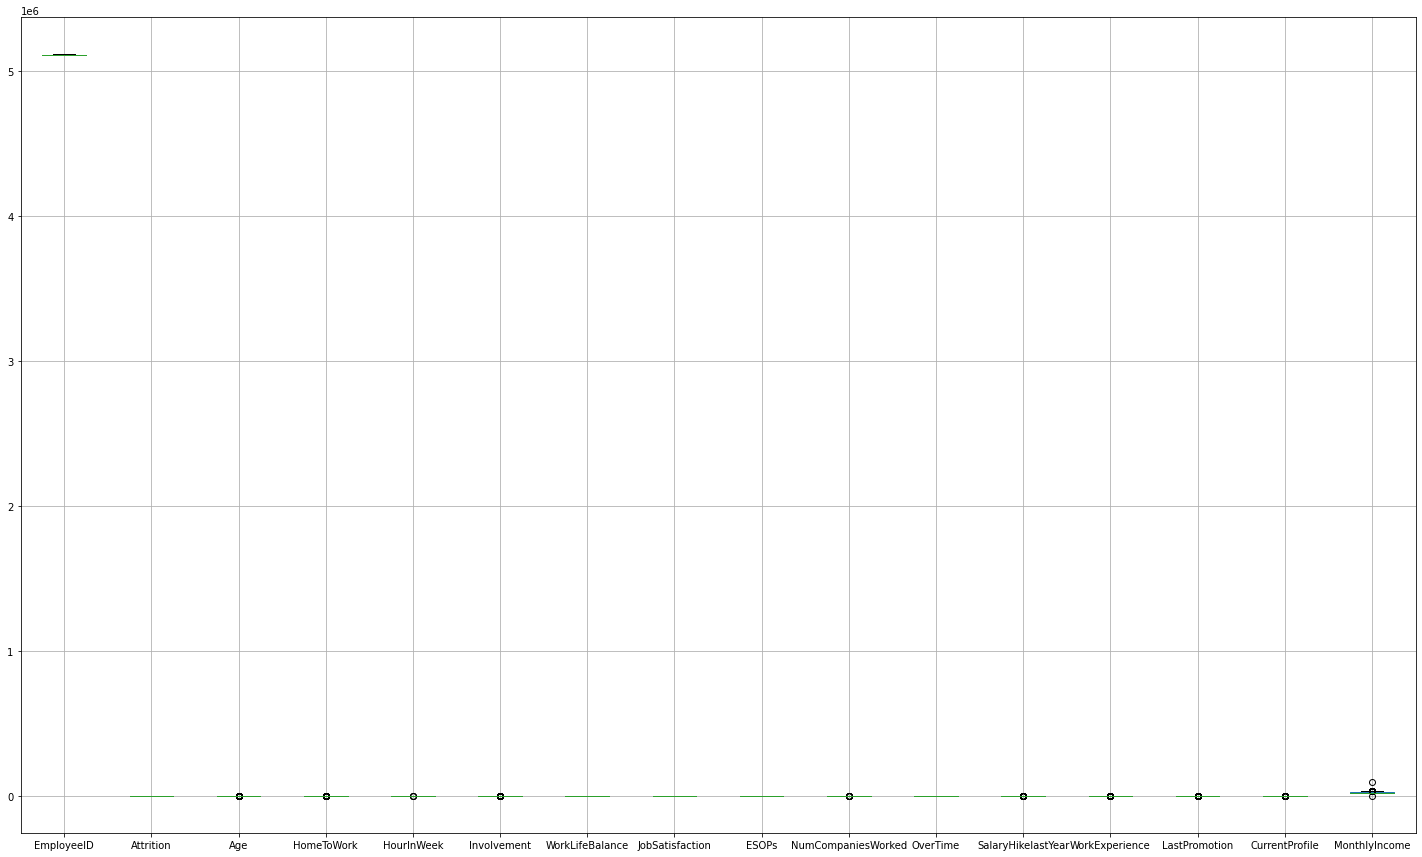

In [32]:
plt.figure(figsize=(25,15))
df.boxplot()
plt.show()

# Encoding to the Categorical columns

In [34]:
#Label Encoding for object to numeric conversion
from sklearn.preprocessing import LabelEncoder 
categ = ['TravelProfile','Department','EducationField','Gender','Designation','MaritalStatus']

# Encode Categorical Columns
le = LabelEncoder()
df[categ] = df[categ].apply(le.fit_transform)
df

,EmployeeID,Attrition,Age,TravelProfile,Department,HomeToWork,EducationField,Gender,HourlnWeek,Involvement,...,JobSatisfaction,ESOPs,NumCompaniesWorked,OverTime,SalaryHikelastYear,WorkExperience,LastPromotion,CurrentProfile,MaritalStatus,MonthlyIncome
0,5110001.0,0.0,35.000000,1,0,5.000000,0,1,69.0,1.0,...,1.0,1.0,1.0,1.0,20.0,7.0,2.0,4.385295,1,18932.0
1,5110002.0,1.0,32.000000,2,2,5.000000,5,0,62.0,4.0,...,2.0,0.0,8.0,0.0,20.0,4.0,1.0,4.385295,2,18785.0
2,5110003.0,0.0,31.000000,1,0,5.000000,5,0,45.0,5.0,...,2.0,1.0,3.0,0.0,26.0,12.0,1.0,3.000000,2,22091.0
3,5110004.0,0.0,34.000000,2,2,10.000000,5,0,32.0,3.0,...,4.0,1.0,1.0,0.0,23.0,5.0,1.0,3.000000,0,20302.0
4,5110005.0,0.0,37.000000,0,0,27.000000,5,0,49.0,3.0,...,4.0,1.0,8.0,0.0,21.0,12.0,1.0,9.000000,0,21674.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5175,5115176.0,0.0,36.000000,1,0,13.000000,0,0,53.0,3.0,...,3.0,0.0,4.0,1.0,22.0,11.0,1.0,5.000000,2,22142.0
5176,5115177.0,0.0,37.108553,1,1,9.000000,0,0,66.0,1.0,...,4.0,1.0,9.0,0.0,23.0,8.0,0.0,2.000000,2,17109.0
5177,5115178.0,0.0,29.000000,1,0,11.107411,0,0,62.0,4.0,...,1.0,1.0,6.0,0.0,19.0,8.0,0.0,3.000000,1,17532.0
5178,5115179.0,0.0,26.000000,1,1,26.000000,5,0,61.0,3.0,...,3.0,0.0,1.0,0.0,28.0,8.0,5.0,7.000000,0,17942.0


# Extracting dependent and independent variables

In [35]:
X=df.iloc[:,2:]#independent variable
X.head()

,Age,TravelProfile,Department,HomeToWork,EducationField,Gender,HourlnWeek,Involvement,WorkLifeBalance,Designation,JobSatisfaction,ESOPs,NumCompaniesWorked,OverTime,SalaryHikelastYear,WorkExperience,LastPromotion,CurrentProfile,MaritalStatus,MonthlyIncome
0,35.0,1,0,5.0,0,1,69.0,1.0,1.0,1,1.0,1.0,1.0,1.0,20.0,7.0,2.0,4.385295,1,18932.0
1,32.0,2,2,5.0,5,0,62.0,4.0,3.0,1,2.0,0.0,8.0,0.0,20.0,4.0,1.0,4.385295,2,18785.0
2,31.0,1,0,5.0,5,0,45.0,5.0,3.0,2,2.0,1.0,3.0,0.0,26.0,12.0,1.0,3.000000,2,22091.0
3,34.0,2,2,10.0,5,0,32.0,3.0,2.0,2,4.0,1.0,1.0,0.0,23.0,5.0,1.0,3.000000,0,20302.0
4,37.0,0,0,27.0,5,0,49.0,3.0,4.0,2,4.0,1.0,8.0,0.0,21.0,12.0,1.0,9.000000,0,21674.0


In [36]:
y=df.iloc[:,1:2]#dependent variable
y

,Attrition
0,0.0
1,1.0
2,0.0
3,0.0
4,0.0
...,...
5175,0.0
5176,0.0
5177,0.0
5178,0.0


#standard scaling to improve accuracy







In [37]:
from sklearn.preprocessing import StandardScaler
SS=StandardScaler()
X.iloc[:,2:]=SS.fit_transform(X.iloc[:,2:])
X.head()

,Age,TravelProfile,Department,HomeToWork,EducationField,Gender,HourlnWeek,Involvement,WorkLifeBalance,Designation,JobSatisfaction,ESOPs,NumCompaniesWorked,OverTime,SalaryHikelastYear,WorkExperience,LastPromotion,CurrentProfile,MaritalStatus,MonthlyIncome
0,35.0,1,-0.724589,-0.740832,-1.267416,0.806028,0.872530,-2.552472,-1.427005,-0.741481,-1.597145,1.019101,-0.827903,1.479748,-0.178147,-0.544200,-0.172104,0.000000,-0.203958,-0.583924
1,32.0,2,1.450018,-0.740832,1.026349,-1.240651,0.318303,0.886527,-0.009033,-0.741481,-0.852347,-0.981257,1.858429,-0.675791,-0.178147,-0.936102,-0.483415,0.000000,1.186178,-0.615020
2,31.0,1,-0.724589,-0.740832,1.026349,-1.240651,-1.027676,2.032860,-0.009033,0.318655,-0.852347,1.019101,-0.060379,-0.675791,1.467880,0.108971,-0.483415,-0.395008,1.186178,0.084343
3,34.0,2,1.450018,-0.134330,1.026349,-1.240651,-2.056955,-0.259806,-0.718019,0.318655,0.637248,1.019101,-0.827903,-0.675791,0.644866,-0.805468,-0.483415,-0.395008,-1.594095,-0.294109
4,37.0,0,-0.724589,1.927779,1.026349,-1.240651,-0.710975,-0.259806,0.699952,0.318655,0.637248,1.019101,1.858429,-0.675791,0.096191,0.108971,-0.483415,1.315854,-1.594095,-0.003870


**Train test split**

In [39]:
from sklearn.model_selection import train_test_split
Xtrain,Xtest,Ytrain,Ytest=train_test_split(X,y,test_size=0.20,random_state=0)
print(Xtrain.shape,Ytrain.shape)
print(Xtest.shape,Ytest.shape)

(4144, 20) (4144, 1)
(1036, 20) (1036, 1)


# KNN algorithms

In [40]:
from sklearn.neighbors import KNeighborsClassifier
KNN=KNeighborsClassifier(n_neighbors=2,p=2) #n_neighbors implies k=2 and p=2  implies distance formula is euclidean
KNN.fit(Xtrain,Ytrain)

KNeighborsClassifier(n_neighbors=2)

In [41]:
Ypred=KNN.predict(Xtest)

In [42]:
Ytest

,Attrition
1248,0.0
499,0.0
3378,0.0
2943,0.0
1695,0.0
...,...
1622,0.0
3297,0.0
2836,0.0
3394,0.0


#confusion matrix to compare result

In [43]:
#we can use confusion matrix to compare the results
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(Ytest,Ypred)
cm

Accuracy=(cm[0,0]+cm[1,1])/np.sum(cm)
print('accuracy of KNN algorithms is =',Accuracy,'\n',cm)

accuracy of KNN algorithms is = 0.9575289575289575 
 [[735  19]
 [ 25 257]]


# Decision Tree Algorithms

In [44]:
from sklearn.tree import DecisionTreeClassifier
DT=DecisionTreeClassifier(criterion='entropy',random_state=0)

In [45]:
#apply fit method on training data
DT.fit(Xtrain,Ytrain)
print('traininfg completed')

traininfg completed


In [46]:
#apply prediction on test data
Ypred=DT.predict(Xtest)

In [47]:
#confusion matrix

cm=confusion_matrix(Ypred,Ytest)
Accuracy=(cm[0,0]+cm[1,1])/np.sum(cm)
print('accuracy of DT algorithms is =',Accuracy,'\n',cm)

accuracy of DT algorithms is = 0.9536679536679536 
 [[718  12]
 [ 36 270]]


#checkimng for over fiting and under fiting

In [48]:
def compute_accuracy_train_testset():
    Result=[]
    KNN=KNeighborsClassifier(n_neighbors=13, p=2)
    KNN.fit(Xtrain, Ytrain)
    ytrpred=KNN.predict(Xtrain)
    ytepred=KNN.predict(Xtest)
    cm_train=confusion_matrix(ytrpred, Ytrain)
    cm_test=confusion_matrix(ytepred, Ytest)
    Accuracy_train=(cm_train[0,0]+cm_train[1,1])/np.sum(cm_train)
    Result.append(Accuracy_train)
    Accuracy_test=(cm_test[0,0]+cm_test[1,1])/np.sum(cm_test)
    Result.append(Accuracy_test)
    print(Result)
    return Result

In [49]:
compute_accuracy_train_testset()

[0.8834459459459459, 0.8523166023166023]


[0.8834459459459459, 0.8523166023166023]

#now we will build decision tree classifier model

In [50]:
def compute_accuracy_train_testset(model):
    Result=[]
   
    model.fit(Xtrain, Ytrain)
    ytrpred=model.predict(Xtrain)
    ytepred=model.predict(Xtest)
    cm_train=confusion_matrix(ytrpred, Ytrain)
    cm_test=confusion_matrix(ytepred, Ytest)
    Accuracy_train=(cm_train[0,0]+cm_train[1,1])/np.sum(cm_train)
    Result.append(Accuracy_train)
    Accuracy_test=(cm_test[0,0]+cm_test[1,1])/np.sum(cm_test)
    Result.append(Accuracy_test)
    print('training accuracy=',Accuracy_train)
    print('test accuracy=',Accuracy_test)
    return Result

In [51]:
from sklearn.tree import DecisionTreeClassifier
DT=DecisionTreeClassifier(criterion='entropy',random_state=10)

In [52]:
compute_accuracy_train_testset(DT)

training accuracy= 1.0
test accuracy= 0.9604247104247104


[1.0, 0.9604247104247104]

#Logistic Regression

In [53]:
from sklearn.linear_model import LogisticRegression
LRC=LogisticRegression()
LRC.fit(Xtrain,Ytrain)

LogisticRegression()

In [54]:
#prediction on test data
ytepred=LRC.predict(Xtest)
ytepred

array([0., 0., 0., ..., 0., 1., 0.])

In [55]:
Dprob=LRC.predict_proba(Xtest)
Dprob

array([[0.98671427, 0.01328573],
       [0.9447294 , 0.0552706 ],
       [0.96784459, 0.03215541],
       ...,
       [0.89200365, 0.10799635],
       [0.45031237, 0.54968763],
       [0.56026522, 0.43973478]])

In [56]:
compute_accuracy_train_testset(LRC)

training accuracy= 0.8079150579150579
test accuracy= 0.7963320463320464


[0.8079150579150579, 0.7963320463320464]

#Naive Bayes algorithm

In [57]:
from sklearn.naive_bayes import GaussianNB
GNBC=GaussianNB()
GNBC.fit(Xtrain,Ytrain)

GaussianNB()

In [58]:
ypred=GNBC.predict(Xtest)
ypred

array([0., 0., 0., ..., 0., 1., 1.])

In [59]:
yprob=GNBC.predict_log_proba(Xtest)
yprob

array([[-4.59500586e-06, -1.22905428e+01],
       [-1.58799987e-01, -1.91845930e+00],
       [-7.57895108e-02, -2.61745081e+00],
       ...,
       [-5.04505618e-02, -3.01188063e+00],
       [-8.87564417e-01, -5.30445437e-01],
       [-1.12173468e+00, -3.94101363e-01]])

In [60]:
compute_accuracy_train_testset(GNBC)

training accuracy= 0.7572393822393823
test accuracy= 0.7557915057915058


[0.7572393822393823, 0.7557915057915058]

# Random Forest algorithms

In [61]:
from sklearn.ensemble import RandomForestClassifier
RFC=RandomForestClassifier()
compute_accuracy_train_testset(RFC)

training accuracy= 1.0
test accuracy= 0.9855212355212355


[1.0, 0.9855212355212355]